In [70]:
%matplotlib inline
# Dependencies
import tweepy
import warnings
warnings.simplefilter('ignore')

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import numpy as np

In [66]:
# Target users BBC, CBS, CNN, Fox, and New York times
target_users = ['@BBCWorld', "@CBSNews", "@CNN", "@nytimes", "@FoxNews"]

# results_list = []

# Initialize lists for sentiment results
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_list = []
twt_id_list = []
twt_ago_list = []
date_list = []

# Looping through target users
for user in target_users:
    
    # Initialize the oldest tweet variable
    oldest_tweet = None
    counter = 1
        
    # Loop through tweet pages
    for x in range(5):
        
        # Grab the tweets
        public_tweets = api.user_timeline(user,
                                         count = 100,
                                         result_type="recent",
                                         max_id = oldest_tweet)
        
        # Loop through the tweets
        for twt in public_tweets:
            
            # Run sentiment analysis
            results = analyzer.polarity_scores(twt["text"])
            
            # fill the lists
            compound_list.append(results['compound'])
            positive_list.append(results['pos'])
            negative_list.append(results['neg'])
            neutral_list.append(results['neu'])
            user_list.append(user)
            twt_id_list.append(twt['id'])
            date_list.append(datetime.strptime(twt['created_at'], "%a %b %d %H:%M:%S %z %Y"))
            
            # Register the "tweets ago" value and increment the counter
            twt_ago_list.append(counter)
            counter += 1
            
            # Actualize the oldest tweet value
            oldest_tweet = twt["id"] - 1


In [68]:
# Create a DataFrame
df = pd.DataFrame({"UserName": user_list,
                   "Tweets ago": twt_ago_list,
                   "Date": date_list,
                   "Tweet ID" : twt_id_list,
                   "Compound": compound_list,
                  "Positive": positive_list,
                  "Negative": negative_list,
                  "Neutral": neutral_list,
                    })

df.head()
# df.count()

,UserName,Tweets ago,Date,Tweet ID,Compound,Positive,Negative,Neutral
0,@BBCWorld,1,2018-10-07 17:05:38+00:00,1048982695748030464,-0.3612,0.0,0.238,0.762
1,@BBCWorld,2,2018-10-07 16:42:28+00:00,1048976864482664448,0.0000,0.0,0.000,1.000
2,@BBCWorld,3,2018-10-07 16:14:08+00:00,1048969737366118400,-0.7906,0.0,0.467,0.533
3,@BBCWorld,4,2018-10-07 15:25:50+00:00,1048957582294044673,-0.8126,0.0,0.583,0.417
4,@BBCWorld,5,2018-10-07 15:05:46+00:00,1048952530229755907,0.0000,0.0,0.000,1.000


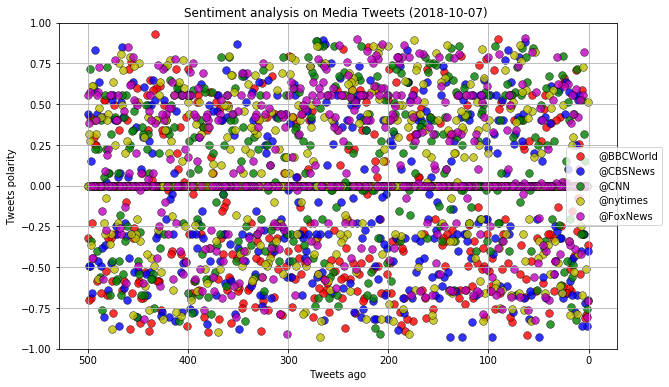

In [76]:
# Plot the results
fig1_name = os.path.join("plots",'scatter_twt_sentiment.png')
# today's date to append in the title
now =datetime.now()
str_now = now.strftime("%Y-%m-%d")

plt.figure(figsize=(10, 6),facecolor="w")

plt.hold(True)

color_list = ["r","b","g","y","m"]
ii = 0
for user in target_users:
    xval = df.loc[df['UserName'] == user]['Tweets ago']
    yval = df.loc[df['UserName'] == user]['Compound']
    plt.scatter(xval, yval, 
                color=color_list[ii], 
                alpha=0.8, 
                edgecolor='k',
                linewidth=0.5,
                s = 60,
                label=user)
    
    ii += 1

plt.xlabel('Tweets ago')
plt.ylabel('Tweets polarity')
plt.title(f"Sentiment analysis on Media Tweets ({str_now}) ")

plt.legend()
ax = plt.gca()
ax.invert_xaxis()
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.grid()
plt.ylim(-1,1)

plt.savefig(fig1_name)

plt.show()



 


In [19]:
xval

NameError: name 'xval' is not defined

In [31]:
# xval = df["UserName"==user]
# yval = df["UserName"==user]['Compound']
# df.loc[["UserName"=="@BBCWorld"]]

type()

pandas.core.series.Series